In [1]:
from lbm.datasets.housing_locations import Preprocessor
import pandas as pd

processor = Preprocessor(include_all_labels=True)
train_loader, val_loader, test_loader = processor.get_loaders()

feature_names = processor.get_feature_names()
label_names = processor.get_label_names()

df1 = pd.DataFrame(columns=feature_names)
df2 = pd.DataFrame(columns=label_names)
for X, Y in train_loader:
    for x in X:
        df1.loc[len(df1)] = x.numpy()
    for y in Y:
        df2.loc[len(df2)] = y.numpy()
display(df1)
display(df2)

,latitude,longitude
0,37.430000,-122.110001
1,37.740002,-122.459999
2,39.250000,-122.080002
3,37.340000,-122.019997
4,37.000000,-122.029999
...,...,...
16341,33.599998,-117.680000
16342,33.130001,-115.519997
16343,34.180000,-118.919998
16344,39.529999,-121.650002


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
16341,1.0,0.0,0.0,0.0,0.0
16342,0.0,1.0,0.0,0.0,0.0
16343,1.0,0.0,0.0,0.0,0.0
16344,0.0,1.0,0.0,0.0,0.0


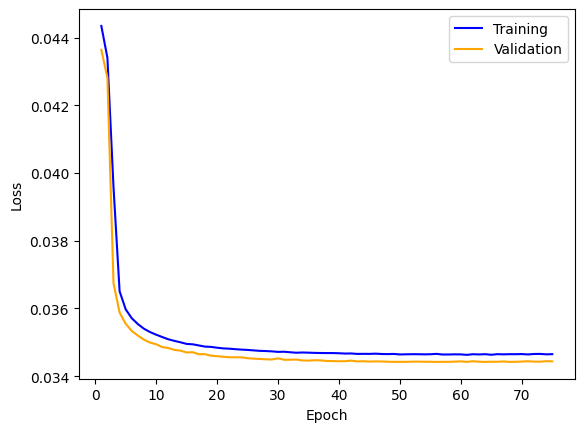

In [40]:
from lbm.models import MLPClassifier
from lbm.workflow import train_and_validate
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import numpy as np

means, stds = processor.get_z_score()
model = MLPClassifier(
    len(feature_names),
    [
        len(feature_names) * 10000
    ], 
    len(label_names), 
    means,
    stds,
    dropout=0.2
)

optimizer = optim.SGD(model.parameters(), weight_decay=0.01)
loss_fn = nn.CrossEntropyLoss()
train_losses, val_losses = train_and_validate(
    model,
    train_loader,
    val_loader,
    optimizer,
    loss_fn,
    epochs=75
)
plt.plot(np.arange(1, len(train_losses) + 1), train_losses, label='Training', color='blue')
plt.plot(np.arange(1, len(val_losses) + 1), val_losses, label='Validation', color='orange')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [41]:
from lbm.workflow import avg_accuracy

accuracy = avg_accuracy(model, val_loader)
print(f'Accuracy: {accuracy:.2%}')



Accuracy: 82.23%
